# Basic churn prediction using EDA and Classification algorithms. <a class="tocSkip">

November 2022

Telecom companies experience a significant loss when customers decide to unsubscribe from their services, a phenomenon known as customer churn. It is crucial for these companies to have accurate and efficient tools to predict customer churn, in order to take proactive measures to retain their valued customers.

Predicting telecom churn is important because it allows telecommunications companies to proactively identify and address potential issues with their customer base. This can help to reduce customer churn and increase revenue for the company. By identifying at-risk customers early on, the company can take steps to retain those customers and improve their overall satisfaction.

Additionally, predicting telecom churn can also help companies to better understand the reasons why customers may be leaving. This can inform business decisions and strategies to improve customer retention and acquisition. For example, if a company finds that a significant number of customers are leaving due to poor network coverage, they may invest in improving network infrastructure in those areas to prevent future churn. By identifying the root causes of churn, a company can develop more targeted and effective strategies to reduce it.

# This Project <a class="tocSkip">

This project will involve several steps, such as data preprocessing, feature engineering, model selection and training, and model evaluation. The trained model will then be deployed on a web application, which will allow the company's customer service team to easily input new customer information and obtain churn predictions in real-time. Additionally, the predictions obtained by the model will also help the company to focus on the most valuable customers, and design retention strategies accordingly.

Overall, the goal of this project is to empower the company to take proactive measures to retain its customers, ultimately resulting in increased revenue and customer satisfaction.

# Webapp 

I have also created a webapp that predicts whether a customer will churn or not based on some user input parameters:

check it out here: https://churn-b-gone.up.railway.app/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-EDA" data-toc-modified-id="Basic-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic EDA</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualizations</a></span></li><li><span><a href="#Model-Evaluation-Functions" data-toc-modified-id="Model-Evaluation-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Evaluation Functions</a></span></li><li><span><a href="#Evalutation-metrics-I-used-in-this-classifiction-problem:" data-toc-modified-id="Evalutation-metrics-I-used-in-this-classifiction-problem:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evalutation metrics I used in this classifiction problem:</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Applying-logistic-regression" data-toc-modified-id="Applying-logistic-regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Applying logistic regression</a></span></li><li><span><a href="#Evaluating-Logistic-Regression-Model" data-toc-modified-id="Evaluating-Logistic-Regression-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Evaluating Logistic Regression Model</a></span></li><li><span><a href="#KNN-Model-Implementation" data-toc-modified-id="KNN-Model-Implementation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>KNN Model Implementation</a></span></li><li><span><a href="#Evaluating-KNN-Model" data-toc-modified-id="Evaluating-KNN-Model-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Evaluating KNN Model</a></span></li><li><span><a href="#Hyperparameter-tuning-of-KNN" data-toc-modified-id="Hyperparameter-tuning-of-KNN-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Hyperparameter tuning of KNN</a></span></li><li><span><a href="#Decision-Tree-Model-Implementation" data-toc-modified-id="Decision-Tree-Model-Implementation-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Decision Tree Model Implementation</a></span></li><li><span><a href="#Decision-Tree-Model-Evaluation" data-toc-modified-id="Decision-Tree-Model-Evaluation-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Decision Tree Model Evaluation</a></span></li><li><span><a href="#Decision-Tree-hyperparameter-tuning" data-toc-modified-id="Decision-Tree-hyperparameter-tuning-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Decision Tree hyperparameter tuning</a></span></li><li><span><a href="#Random-Forest-Model-Implementation" data-toc-modified-id="Random-Forest-Model-Implementation-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Random Forest Model Implementation</a></span></li><li><span><a href="#Random-Forest-Model-Evaluation" data-toc-modified-id="Random-Forest-Model-Evaluation-5.10"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>Random Forest Model Evaluation</a></span></li><li><span><a href="#Random-Forest-Hyperparameter-tuning" data-toc-modified-id="Random-Forest-Hyperparameter-tuning-5.11"><span class="toc-item-num">5.11&nbsp;&nbsp;</span>Random Forest Hyperparameter tuning</a></span></li><li><span><a href="#Implementation-of-XGboost" data-toc-modified-id="Implementation-of-XGboost-5.12"><span class="toc-item-num">5.12&nbsp;&nbsp;</span>Implementation of XGboost</a></span></li></ul></li><li><span><a href="#Comparing-models" data-toc-modified-id="Comparing-models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparing models</a></span></li><li><span><a href="#Saving-the-final-model-for-deployment" data-toc-modified-id="Saving-the-final-model-for-deployment-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Saving the final model for deployment</a></span></li><li><span><a href="#Final-thoughts" data-toc-modified-id="Final-thoughts-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Final thoughts</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score,precision_score,recall_score,f1_score,roc_curve,precision_recall_curve #To evaluate our model
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree
sns.set()
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'



/Users/Mihir/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
telcom = pd.read_csv("telecom_churn.csv")

In [3]:
telcom.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

## Basic EDA

In [4]:
print(telcom.shape)
 

(3333, 20)


to check for dimentioanlity of the dataset.
This shows that there are 3333 rows and 20 columns

In [5]:
print(telcom.columns)
#looking at columns 

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [6]:
telcom.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

To get a general overview of the dataset.
We can see that the target variable churn is boolean. we would need to encode it 0 and 1 for the prediction model
The .info method also allows us to see if there any null values present. this dataset does not have null values so our work becomes a bit eaiser to work with the data.
We also see that there are 3 variables as objects as their data type(dtypes). We would need to encode them too because machine learning algorithms don't understand characters. We would need to encode them to suitable numeric values

In [7]:
# encoding the target variable to binary values using the astype method. 

telcom["Churn"] = telcom["Churn"].astype("int64")

In [8]:
# checking to see if it worked
telcom.head()
# we can see that the last column Churn has changed values from True/False to 0/1

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [9]:
# A good way to gain a statistical insight into the dataframe is by using the describe method
telcom.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls        Churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

In [10]:
# We need explicitly pass objects as parameters into the describe method for categorical variables
telcom.describe(include=["object", "bool"])

State International plan Voice mail plan
count   3333               3333            3333
unique    51                  2               2
top       WV                 No              No
freq     106               3010            2411

In [11]:
# We can use the value counts method for categorcial and boolean datatype features
telcom["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [12]:
# Right of the bat we can see that 2850 customers are loyal. We can see these numbers as percentages as well:
telcom["Churn"].value_counts(normalize = True)
# 85.5 % of customers in this dataset are loyal

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [13]:
# We can use the mean to check for the proportion of churned customers
telcom["Churn"].mean()



0.14491449144914492

14.5 % churn rate is quite severe for any company. 

A side scope for a data scientist could be to recemmomend steps to reduce churn rate. This may include features heavily contributing to churn and helping the company create business startegies for a higher customer retention


In [14]:
# We can use pandas to ask such as:
# What are average values of numerical features for churned users?

churn = telcom["Churn"]==1
telcom[churn].mean()

/var/folders/69/yq7zz3n12pbgn3pfb3cs6j7m0000gn/T/ipykernel_66277/2119531016.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  telcom[churn].mean()


Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [15]:
# How much time (on average) do churned users spend on the phone during daytime?

telcom[churn]["Total day minutes"].mean()

206.91407867494814

In [16]:
#Looking unique values
print(telcom.nunique())

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64


In [17]:
telcom['State'] = telcom['State'].map({'KS':1, 'OH':2, 'NJ':3, 'OK':4, 'AL':5, 'MA':6, 'MO':7, 'LA':8, 'WV':9, 'IN':10, 'RI':11,
       'IA':12, 'MT':13, 'NY':14, 'ID':15, 'VT':16, 'VA':17, 'TX':18, 'FL':19, 'CO':20, 'AZ':21, 'SC':22,
       'NE':23, 'WY':24, 'HI':25, 'IL':26, 'NH':27, 'GA':28, 'AK':29, 'MD':30, 'AR':31, 'WI':32, 'OR':33,
       'MI':34, 'DE':35, 'UT':36, 'CA':37, 'MN':38, 'SD':39, 'NC':40, 'WA':41, 'NM':42, 'NV':43, 'DC':44,
       'KY':45, 'ME':46, 'MS':47, 'TN':48, 'PA':49, 'CT':50, 'ND':51})

In [18]:
telcom.head()

State  Account length  Area code International plan Voice mail plan  \
0      1             128        415                 No             Yes   
1      2             107        415                 No             Yes   
2      3             137        415                 No              No   
3      2              84        408                Yes              No   
4      4              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [19]:
# Creating summary tables
# a contigency table is very similar to a pivot table in excel. It is really informative for initial analysis. It looks at the relationship between the features and how they impact the target feature

pd.crosstab(telcom["Churn"], telcom["International plan"])

International plan    No  Yes
Churn                        
0                   2664  186
1                    346  137

Additonaly I also want to know if the daily number of calls has any impact on churn. I would assume that a customer having more calls in a day is loyal against a customer that makes few calls.
But to calculate the daily number of calls, I have to create another column that sums the day,evening, and night calls.

In [20]:


telcom["Total daily calls"] = (telcom["Total day calls"]+telcom["Total eve calls"]+telcom["Total night calls"]+telcom["Total intl calls"])
telcom.head()

# pd.crosstab(telcom["Churn"], telcom["Total daily calls"])
# telcom["Total daily calls"].mean()

# telcom["Total daily calls below average"] 

State  Account length  Area code International plan Voice mail plan  \
0      1             128        415                 No             Yes   
1      2             107        415                 No             Yes   
2      3             137        415                 No              No   
3      2              84        408                Yes              No   
4      4              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total eve charge  \
0             45.07              197.4  ...             16.78   
1             27.47              195.5  ...             16.62   
2             41.38              121.2  ...             10.30   
3             50.90               61.9  ...              5.26   
4             28.34              148.3  ...             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Total daily calls  
0                       1      0                303  
1                       1      0                332  
2                       0      0                333  
3                       2      0                255  
4                       3      0                359  

[5 rows x 21 columns]

In [21]:
columns_to_show = ["Total daily calls"]

telcom.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

# I notice that customers tend to churn as their average daily calls increase. 
# I concede that there is a very minute difference between the means of the two groups but I felt it should be pointed out


Total daily calls                     
                   mean        std amin amax
Churn                                       
0            304.912982  34.314039  191  416
1            306.459627  35.236367  207  408

In [22]:
# I want to investigate this a little more specifically, using total call minutes

columns = ["Total day minutes", "Total eve minutes", "Total night minutes"]

telcom.groupby(["Churn"])[columns].agg([np.mean, np.std, np.min, np.max])



Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

I notice that the mean of the three features: Total day minutes Total eve minutes Total night minutes are higher for churned customers.

I may be wrong here but this seems odd to me. Intuitevely it would make sense that the longer I use a service, the more loyal I tend to be with the provider.

a seperate analogy would be that I am more likely to NOT churn if my daily or weekly watch time on netflix is higher than the poeple who churn. This means that for this particular dataset, the higher a customer spends time on call on average is more likely to churn.

There could be additional factors to this. Maybe the customers are not happy with the coverage or the price of the plan or the customer service

In [23]:


# International plan
pd.crosstab(telcom["Churn"], telcom["International plan"], margins=True)



International plan    No  Yes   All
Churn                              
0                   2664  186  2850
1                    346  137   483
All                 3010  323  3333

I want to examine the other features that might cause the oddity I found above:

there are 3 features that are left for me to examine: International plan, Voice mail plan, Customer service calls.
I will try to find any meaningful insights by seeing how each of the three features impact the churn

Looking at this table, I can clearly see that loyal customers tend to not have an international plan
However, doing some simple % calculation

out of the customer who did NOT churn, only 6.53% ((186/2850) * 100) had an international plan
here is where it gets interesting:
out of the customers who curned, 28.4% ((137/483) * 100) had an international plan.

In [24]:
# Furthermore I want look at the mean of international calls and how it affects churn
column = ["Total intl minutes","Total intl calls"]

telcom.groupby(["Churn"])[column].agg([np.mean, np.std, np.min, np.max])



Total intl minutes                      Total intl calls                 \
                    mean       std amin  amax             mean       std amin   
Churn                                                                           
0              10.158877  2.784489  0.0  18.9         4.532982  2.441984    0   
1              10.700000  2.793190  2.0  20.0         4.163561  2.551575    1   

            
      amax  
Churn       
0       19  
1       20

I can see that customers who churn have a higher mean total international calls
this could mean that cutomers are unhappy with the coverage or the charge 

In [25]:
# Visualising this would look something like this:

sns.countplot(x="International plan", hue="Churn", data=telcom)

# Looking at this plot, we can see that churn rate is higher for customers having an international plan.


<AxesSubplot: xlabel='International plan', ylabel='count'>

In [26]:
# Voice mail plan
pd.crosstab(telcom["Churn"], telcom["Voice mail plan"], margins=True)

# this does not give me any significant insight. This shows that loyal customers do not have a voice mail plan

Voice mail plan    No  Yes   All
Churn                           
0                2008  842  2850
1                 403   80   483
All              2411  922  3333

In [27]:
# Next I want to look at another important feature that could impact churn

# Customer service calls
pd.crosstab(telcom["Churn"], telcom["Customer service calls"], margins=True)

Customer service calls    0     1    2    3    4   5   6  7  8  9   All
Churn                                                                  
0                       605  1059  672  385   90  26   8  4  1  0  2850
1                        92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333

In [28]:
# I want to look at the mean customer service calls and churn rate

column = ["Customer service calls"]

telcom.groupby(["Churn"])[column].agg([np.mean, np.std, np.min, np.max])

# I can see that the mean of customer service calls is higher for customers who churn

Customer service calls                    
                        mean       std amin amax
Churn                                           
0                   1.449825  1.163883    0    8
1                   2.229814  1.853275    0    9

In [29]:
# Visualsing the contigency table
sns.countplot(x="Customer service calls", hue="Churn", data=telcom)

<AxesSubplot: xlabel='Customer service calls', ylabel='count'>

In [30]:
# there is a sharp of increase of churn from 4+ customer service calls 

In [31]:
# Adding a filter that segments customers who made more than 3 customer service calls
# then creating a contingency table

telcom["Many_service_calls"] = (telcom["Customer service calls"] > 3).astype("int")

pd.crosstab(telcom["Many_service_calls"], telcom["Churn"], margins=True)

# we can see that out of the customer who churned. 11.25% made more than 3 customer service calls
# However 51.7% customers who churned made more than 3 customer service calls.

Churn                  0    1   All
Many_service_calls                 
0                   2721  345  3066
1                    129  138   267
All                 2850  483  3333

<AxesSubplot: xlabel='Many_service_calls', ylabel='count'>

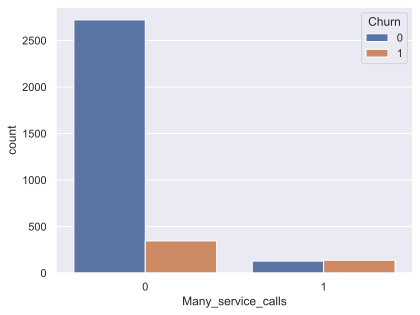

In [32]:
sns.countplot(x="Many_service_calls", hue="Churn", data=telcom)

In [33]:
# #encoding International plan from Yes/No to True/False using .map method
d = {"No": False, "Yes": True}
telcom["International plan"] = telcom["International plan"].map(d)
telcom.head()

State  Account length  Area code  International plan Voice mail plan  \
0      1             128        415               False             Yes   
1      2             107        415               False             Yes   
2      3             137        415               False              No   
3      2              84        408                True              No   
4      4              75        415                True              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total night minutes  \
0             45.07              197.4  ...                244.7   
1             27.47              195.5  ...                254.4   
2             41.38              121.2  ...                162.6   
3             50.90               61.9  ...                196.9   
4             28.34              148.3  ...                186.9   

   Total night calls  Total night charge  Total intl minutes  \
0                 91               11.01                10.0   
1                103               11.45                13.7   
2                104                7.32                12.2   
3                 89                8.86                 6.6   
4                121                8.41                10.1   

   Total intl calls  Total intl charge  Customer service calls  Churn  \
0                 3               2.70                       1      0   
1                 3               3.70                       1      0   
2                 5               3.29                       0      0   
3                 7               1.78                       2      0   
4                 3               2.73                       3      0   

   Total daily calls  Many_service_calls  
0                303                   0  
1                332                   0  
2                333                   0  
3                255                   0  
4                359                   0  

[5 rows x 22 columns]

In [34]:
# Now combining this with the international plan feature could give us a more significant insight 

pd.crosstab(telcom["Many_service_calls"] & telcom["International plan"], telcom["Churn"])

Churn     0    1
row_0           
False  2841  464
True      9   19

Therefore, predicting that a customer is not loyal (Churn=1) in the case when the number of calls to the service center is greater than 3 and the International Plan is added (and predicting Churn=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got through this very simple reasoning serves as a good starting point (baseline) for the further machine learning models that we will build.

As we move on through this course, recall that, before the advent of machine learning, the data analysis process looked something like this. Let’s recap what we’ve covered:

The share of loyal clients in the dataset is 85.5%. The most naive model that always predicts a “loyal customer” on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (accuracy) of subsequent models should be no less than this number, and will hopefully be significantly higher;

With the help of a simple prediction that can be expressed by the following formula: International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0, we can expect a guessing rate of 85.8%, which is just above 85.5%. Subsequently, we’ll talk about decision trees and figure out how to find such rules automatically based only on the input data;

We got these two baselines without applying machine learning, and they’ll serve as the starting point for our subsequent models. If it turns out that with enormous effort, we increase accuracy by only 0.5%, persay, then possibly we are doing something wrong, and it suffices to confine ourselves to a simple “if-else” model with two conditions;

Before training complex models, it is recommended to wrangle the data a bit, make some plots, and check simple assumptions. Moreover, in business applications of machine learning, they usually start with simple solutions and then experiment with more complex ones.

## Visualizations

In [35]:
# Univariate visualization

Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

2.1 Quantitative features
Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame’s method hist().

array([[<AxesSubplot: title={'center': 'State'}>,
        <AxesSubplot: title={'center': 'Account length'}>,
        <AxesSubplot: title={'center': 'Area code'}>,
        <AxesSubplot: title={'center': 'Number vmail messages'}>],
       [<AxesSubplot: title={'center': 'Total day minutes'}>,
        <AxesSubplot: title={'center': 'Total day calls'}>,
        <AxesSubplot: title={'center': 'Total day charge'}>,
        <AxesSubplot: title={'center': 'Total eve minutes'}>],
       [<AxesSubplot: title={'center': 'Total eve calls'}>,
        <AxesSubplot: title={'center': 'Total eve charge'}>,
        <AxesSubplot: title={'center': 'Total night minutes'}>,
        <AxesSubplot: title={'center': 'Total night calls'}>],
       [<AxesSubplot: title={'center': 'Total night charge'}>,
        <AxesSubplot: title={'center': 'Total intl minutes'}>,
        <AxesSubplot: title={'center': 'Total intl calls'}>,
        <AxesSubplot: title={'center': 'Total intl charge'}>],
       [<AxesSubplot: titl

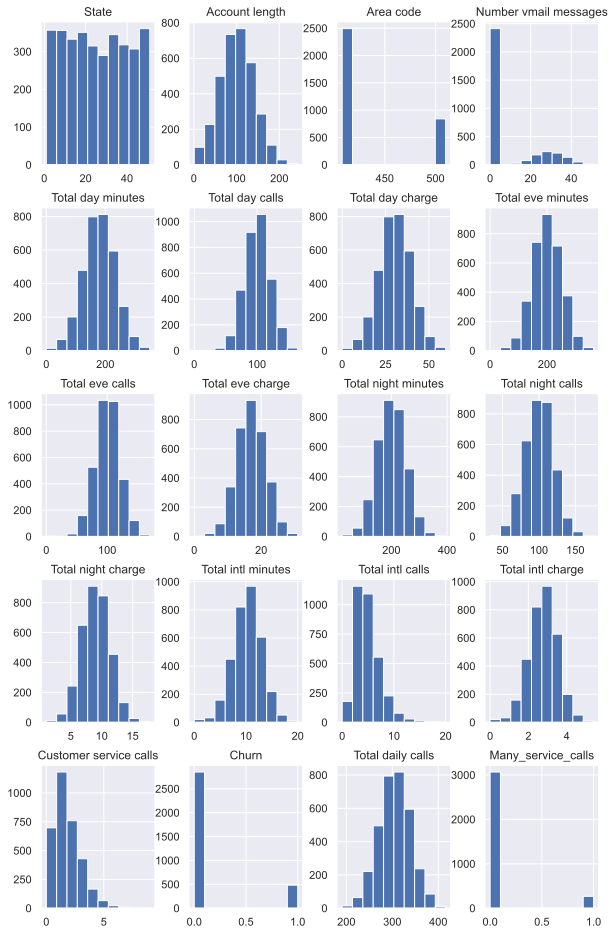

In [36]:
features = list(telcom.columns)
telcom[features].hist(figsize=(10, 16))

looking at all these histograms, we can assess each features distribution. We have to ignore the categorical features like State, Area Code.

after examining each histogram, we can see that most of the features follow a normal distrition, except Total intl calls and *Customer service calls.

array([[<AxesSubplot: title={'center': 'Total day minutes'}>]],
      dtype=object)

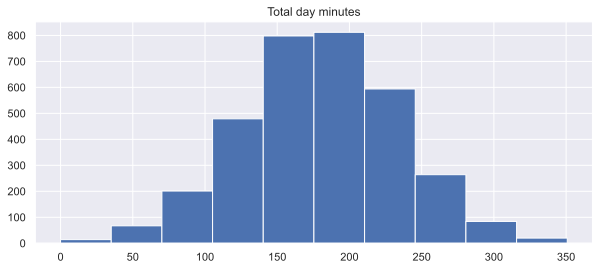

In [37]:
# Normally distributed features looks like this:
feature = ["Total day minutes"]
telcom[feature].hist(figsize=(10, 4))

array([[<AxesSubplot: title={'center': 'Total intl calls'}>]],
      dtype=object)

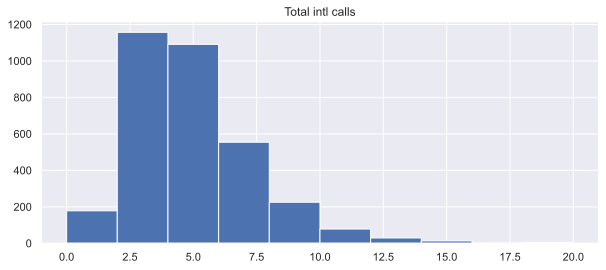

In [38]:
# Skewness is features: 

features = ["Total intl calls"]
telcom[features].hist(figsize=(10, 4))

# looking at this, we can say that both these features are right skewed.

In [39]:
# creating a kernel density plots of total intl calls and total day minutes:

features = ["Total day minutes","Total intl calls"]
telcom[features].plot(kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4))

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

In [40]:
# #Box plot
# features = list(telcom.columns)
# sns.boxplot(x=features, data=telcom)

creating a box plot of Total intl calls


We can see the outliers marked as individual black points that fall outside the whiskers. Box plots are good for highlighting outliers which might later hinder our analysis

In [41]:
# Violin plot

<AxesSubplot: >

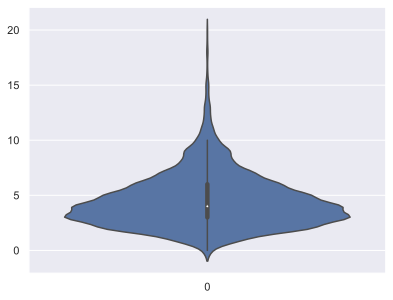

In [42]:
sns.violinplot(data=telcom["Total intl calls"])

2.2 Categorical and binary features
Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called ordinal.

Frequency table
Let’s check the class balance in our dataset by looking at the distribution of the target variable: the churn rate. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the value_counts() method:

Bar plot
The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the seaborn’s function countplot(). There is another function in seaborn that is somewhat confusingly called barplot() and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let’s plot the distributions for two categorical variables:

<AxesSubplot: xlabel='Churn', ylabel='count'>

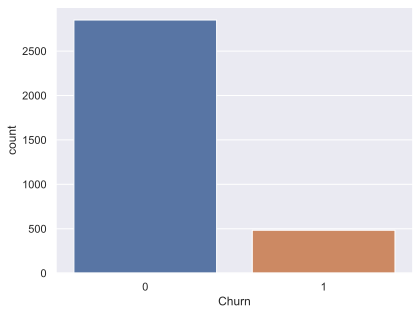

In [43]:
sns.countplot(x="Churn", data=telcom)

In [44]:
sns.countplot(x="Customer service calls", data=telcom)

<AxesSubplot: xlabel='Customer service calls', ylabel='count'>

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for Customer service calls on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let’s move on to some more interesting and powerful visual techniques.

Let’s look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values:

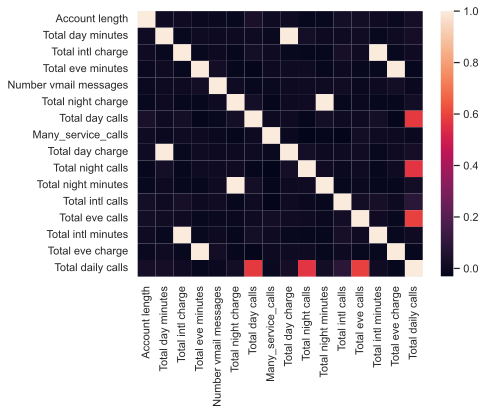

In [45]:
# Drop non-numerical variables
numerical = list(
    set(telcom.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = telcom[numerical].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. Let’s get rid of them:

In [46]:
numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)

Scatter plot
The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible.

Let’s try out the function scatter() from the matplotlib library:

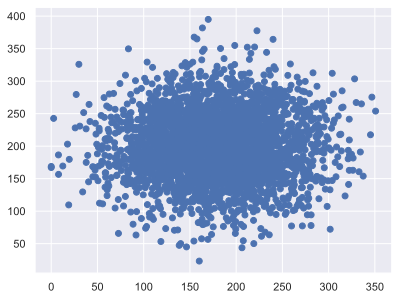

In [47]:
plt.scatter(telcom["Total day minutes"], telcom["Total night minutes"]);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the seaborn library:

In [48]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=telcom, kind="scatter")

Scatterplot matrix
In some cases, we may want to plot a scatterplot matrix such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

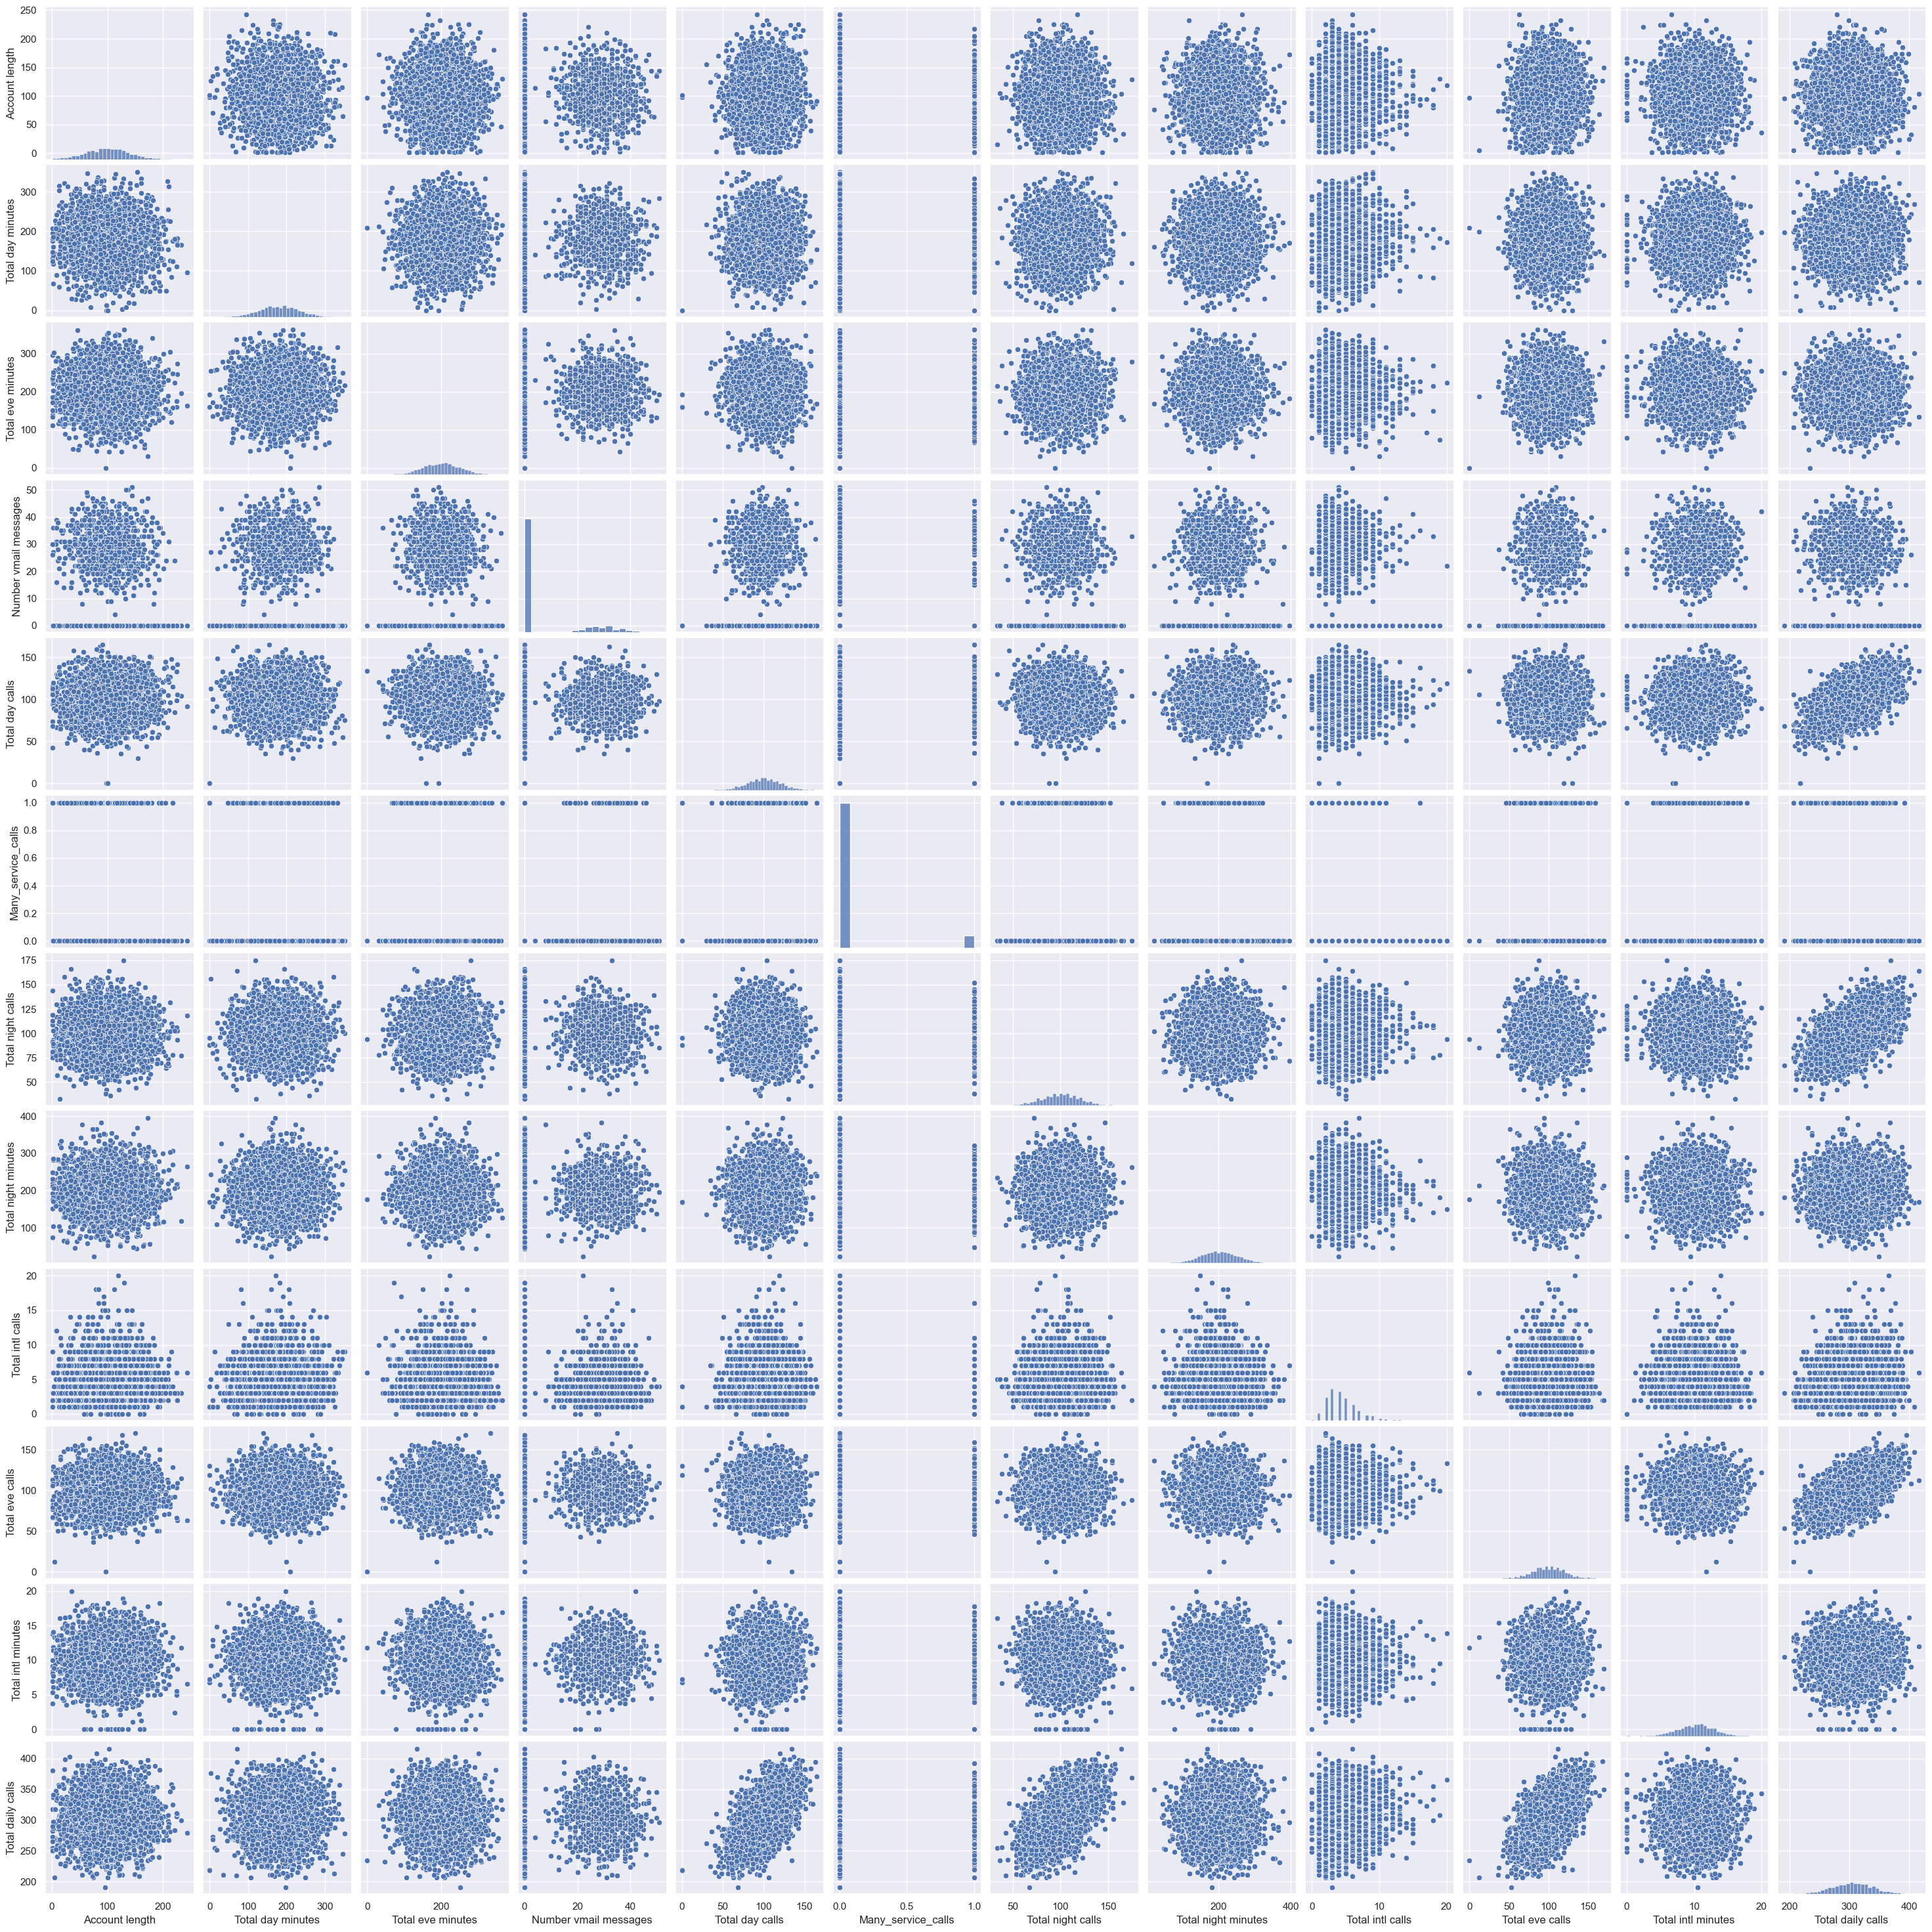

In [49]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(telcom[numerical])

In [50]:
%config InlineBackend.figure_format = 'svg'

In [51]:
# sns.lmplot("Total day minutes", "Total night minutes", data=telcom, hue="Churn", fit_reg=False)

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won’t make any definitive conclusions from this chart.

Now, let’s create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (Churn=False) and those who left (Churn=True).

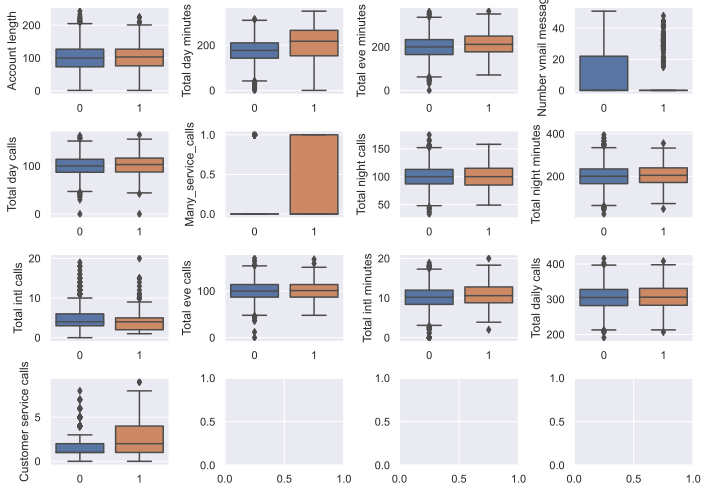

In [52]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=telcom, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: Total day minutes, Customer service calls, and Number vmail messages. Later in this course, we will learn how to determine feature importance in classification using Random Forest or Gradient Boosting; there, we will see that the first two features are indeed very important for churn prediction.

Let’s look at the distribution of day minutes spoken for the loyal and disloyal customers separately. We will create box and violin plots for Total day minutes grouped by the target variable.

In [53]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=telcom, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=telcom, ax=axes[1])

<AxesSubplot: xlabel='Churn', ylabel='Total day minutes'>

In this case, the violin plot does not contribute any additional information about our data as everything is clear from the box plot alone: disloyal customers tend to talk on the phone more.

An interesting observation: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the seaborn library called catplot(). For example, let’s visualize the interaction between Total day minutes and two categorical variables in the same plot:

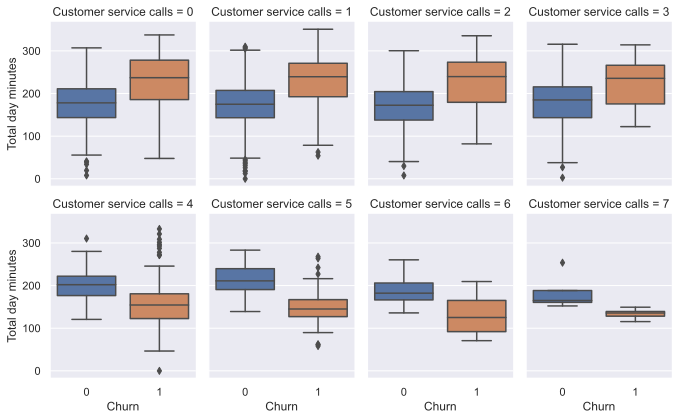

In [54]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=telcom[telcom["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
)

From this, we could conclude that, starting with 4 calls, Total day minutes may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

## Model Evaluation Functions

In [55]:
# Y_pred is the probability of classes and curves depicts positive class
def curves(Y_true,Y_pred):
    plt.figure(figsize=(11,5))
    plt.subplot(121)
    
    #ROC CURVE
    false_pr,true_pr,_ = roc_curve(Y_true,Y_pred[:,1])
    plt.title('ROC (Receiver Operating Characteristics) curve')
    plt.plot([0,1],[0,1],'--')
    plt.plot(false_pr,true_pr,'.-',label='Roc_curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    plt.subplot(122)
    
    # PR CURVE
    plt.title('Precision-Recall Curve')
    precision, recall, _ = precision_recall_curve(Y_true,Y_pred[:,1])
    plt.plot(recall,precision,'.-',label='PR CURVE')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    #PR v/s ROC CURVE 
    plt.title('PR v/s ROC CURVE ')
    plt.plot(false_pr,true_pr,'.-',label='Roc_curve')
    plt.plot(recall,precision,'.-',label='PR CURVE')
    plt.legend()
    plt.show()

In [56]:
def plot_ConfusionMatrix(Y_true,Y_pred):
    plt.title('Confusion Matirx')
    conf_matrix = confusion_matrix(Y_true,Y_pred)
    sns.heatmap(conf_matrix,annot=True,xticklabels=['N', 'Y'],yticklabels=['N', 'Y'],fmt='.5g')


def scores(Y_true,Y_pred):
    accuracy = accuracy_score(Y_true,Y_pred)
    print("Accuracy  :: {}".format("%.2f" %accuracy))
    
    
    precision = precision_score(Y_true,Y_pred)
    print("Precision :: {}".format("%.2f" %precision))
    
    recall = recall_score(Y_true,Y_pred)
    print("Recall    :: {}".format("%.2f" %recall))
    
    tn, fp, fn, tp = confusion_matrix(Y_true, Y_pred).ravel()
    specificity = tn / (tn+fp)
    print("Specificity :: {}".format("%.2f" %specificity))
    
    fscore = f1_score(Y_true,Y_pred)
    print("F1score   :: {}".format("%.2f" %fscore))

## Evalutation metrics I used in this classifiction problem:

1. confusion matrix
    -> Precsion
    -> Recall
    -> F1 Score
2. ROC curve
3. Precision/Recall curve



## Model Building

In [57]:
# This completes the exploratory data analysis and visualisation part of the project
# Now we are at the stage to apply different classification models to predict churn 

# peeking the dataset to check for any discrepencies and last minute processing

telcom

State  Account length  Area code  International plan Voice mail plan  \
0         1             128        415               False             Yes   
1         2             107        415               False             Yes   
2         3             137        415               False              No   
3         2              84        408                True              No   
4         4              75        415                True              No   
...     ...             ...        ...                 ...             ...   
3328     21             192        415               False             Yes   
3329      9              68        415               False              No   
3330     11              28        510               False              No   
3331     50             184        510                True              No   
3332     48              74        415               False             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  ...  Total night minutes  \
0                45.07              197.4  ...                244.7   
1                27.47              195.5  ...                254.4   
2                41.38              121.2  ...                162.6   
3                50.90               61.9  ...                196.9   
4                28.34              148.3  ...                186.9   
...                ...                ...  ...                  ...   
3328             26.55              215.5  ...                279.1   
3329             39.29              153.4  ...                191.3   
3330             30.74              288.8  ...                191.9   
3331             36.35              159.6  ...                139.2   
3332             39.85              265.9  ...                241.4   

      Total night calls  Total night charge  Total intl minutes  \
0                    91               11.01                10.0   
1                   103               11.45                13.7   
2                   104                7.32                12.2   
3                    89                8.86                 6.6   
4                   121                8.41                10.1   
...                 ...                 ...                 ...   
3328                 83               12.56                 9.9   
3329                123                8.61                 9.6   
3330                 91                8.64                14.1   
3331                137                6.26                 5.0   
3332                 77               10.86                13.7   

      Total intl calls  Total intl charge  Customer service calls  Churn  \
0                    3               2.70                       1      0   
1                    3               3.70                       1      0   
2                    5               3.29                       0      0   
3                    7               1.78                       2      0   
4                    3               2.73                       3      0   
...                ...                ...                     ...    ...   
3328                 6               2.67                       2      0  

In [58]:
# I will encode the following categorical features to binary:
# International plan
# Voice mail plan
telcom["International plan"] = pd.factorize(telcom["International plan"])[0]
telcom["Voice mail plan"] = telcom["Voice mail plan"].map({"No":0,"Yes":1})
#telcom["International plan"] = telcom["International plan"].map({"False":0,"True":1})

In [59]:
telcom

State  Account length  Area code  International plan  Voice mail plan  \
0         1             128        415                   0                1   
1         2             107        415                   0                1   
2         3             137        415                   0                0   
3         2              84        408                   1                0   
4         4              75        415                   1                0   
...     ...             ...        ...                 ...              ...   
3328     21             192        415                   0                1   
3329      9              68        415                   0                0   
3330     11              28        510                   0                0   
3331     50             184        510                   1                0   
3332     48              74        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  ...  Total night minutes  \
0                45.07              197.4  ...                244.7   
1                27.47              195.5  ...                254.4   
2                41.38              121.2  ...                162.6   
3                50.90               61.9  ...                196.9   
4                28.34              148.3  ...                186.9   
...                ...                ...  ...                  ...   
3328             26.55              215.5  ...                279.1   
3329             39.29              153.4  ...                191.3   
3330             30.74              288.8  ...                191.9   
3331             36.35              159.6  ...                139.2   
3332             39.85              265.9  ...                241.4   

      Total night calls  Total night charge  Total intl minutes  \
0                    91               11.01                10.0   
1                   103               11.45                13.7   
2                   104                7.32                12.2   
3                    89                8.86                 6.6   
4                   121                8.41                10.1   
...                 ...                 ...                 ...   
3328                 83               12.56                 9.9   
3329                123                8.61                 9.6   
3330                 91                8.64                14.1   
3331                137                6.26                 5.0   
3332                 77               10.86                13.7   

      Total intl calls  Total intl charge  Customer service calls  Churn  \
0                    3               2.70                       1      0   
1                    3               3.70                       1      0   
2                    5               3.29                       0      0   
3                    7               1.78                       2      0   
4                    3               2.73                       3      0   
...                ...                ...                     ...    ...   
3328                 6               2.67                     

In [60]:
# Now i want to extract the target feature Churn into anther dataset
# I don't need state as it is not a significant feature for this analysis so I am dropping it from the dataset along with Churn.
churn_target = telcom[["Churn"]].copy()
telcom = telcom.drop(["State", "Churn","Many_service_calls","Total daily calls","Total day charge","Total eve charge","Total night charge","Total intl charge"],axis=1)

In [61]:
churn_target

Churn
0         0
1         0
2         0
3         0
4         0
...     ...
3328      0
3329      0
3330      0
3331      0
3332      0

[3333 rows x 1 columns]

In [62]:
telcom

Account length  Area code  International plan  Voice mail plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             192        415                   0                1   
3329              68        415                   0                0   
3330              28        510                   0                0   
3331             184        510                   1                0   
3332              74        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total eve minutes  Total eve calls  Total night minutes  \
0                 197.4               99                244.7   
1                 195.5              103                254.4   
2                 121.2              110                162.6   
3                  61.9               88                196.9   
4                 148.3              122                186.9   
...                 ...              ...                  ...   
3328              215.5              126                279.1   
3329              153.4               55                191.3   
3330              288.8               58                191.9   
3331              159.6               84                139.2   
3332              265.9               82                241.4   

      Total night calls  Total intl minutes  Total intl calls  \
0                    91                10.0                 3   
1                   103                13.7                 3   
2                   104                12.2                 5   
3                    89                 6.6                 7   
4                   121                10.1                 3   
...                 ...                 ...               ...   
3328                 83                 9.9                 6   
3329                123                 9.6                 4   
3330                 91                14.1                 6   
3331                137                 5.0                10   
3332                 77                13.7                 4   

      Customer service calls  
0                          1  
1                          1  
2                          0  
3                          2  
4                          3  
...                      ...  
3328                       2  
3329                       3  
3330                       2  
3331                       2  
3332                       0  

[3333 rows x 14 columns]

In [63]:
# Both datasets look good to me to start applying the models

In [64]:
# Splitting the two datasets into test and train. I am going with an 80-20% split
x_train,x_test,y_train,y_test = train_test_split(telcom,churn_target,test_size=0.2,random_state=42)

In [65]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2666, 14)
(667, 14)
(2666, 1)
(667, 1)


### Applying logistic regression

In [66]:
logit = LogisticRegression()
logit.fit(x_train, y_train)
y_pred_logit = logit.predict(x_test)

y_train_pred_logit = logit.predict(x_train)
y_test_pred_logit = logit.predict(x_test)

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluating Logistic Regression Model

Accuracy  :: 0.85
Precision :: 0.57
Recall    :: 0.04
Specificity :: 0.99
F1score   :: 0.07
Logistic Regression train/test accuracies 0.857/0.850


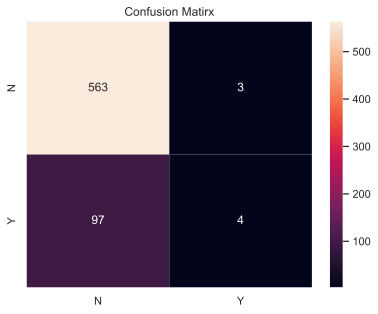

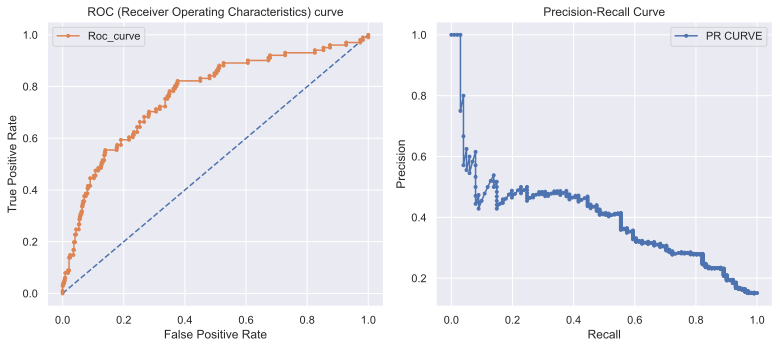

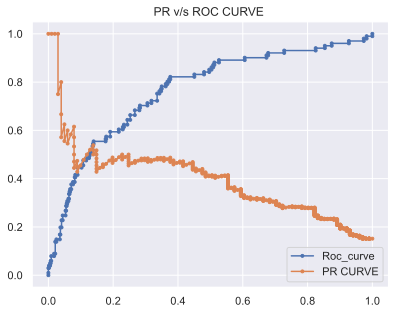

In [67]:
scores(y_test,y_pred_logit)
logit_train = accuracy_score(y_train, y_train_pred_logit)
logit_test = accuracy_score(y_test, y_test_pred_logit)
print('Logistic Regression train/test accuracies %.3f/%.3f'% (logit_train, logit_test))
plot_ConfusionMatrix(y_test,y_pred_logit)
predProb_logit = logit.predict_proba(x_test)
curves(y_test,predProb_logit)

### KNN Model Implementation

In [68]:
knn = KNeighborsClassifier(n_neighbors=10)
# Implementing KNN with K as 10
# Need to scale data for KNN
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)

y_train_pred_knn = knn.predict(x_train_scaled)
y_test_pred_knn = knn.predict(x_test_scaled)

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the d

### Evaluating KNN Model

Accuracy  :: 0.86
Precision :: 0.78
Recall    :: 0.14
Specificity :: 0.99
F1score   :: 0.24
KNN train/test accuracies 0.882/0.864


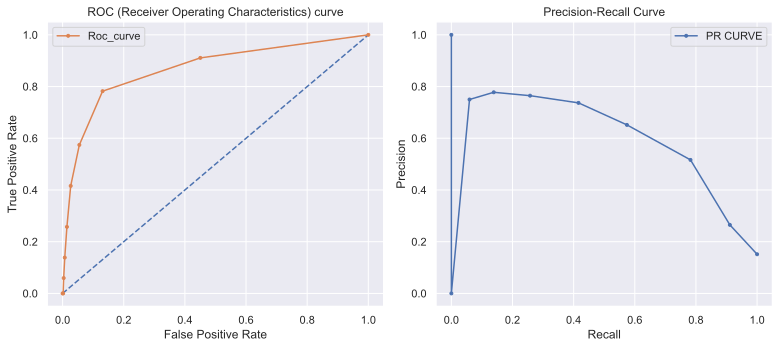

In [69]:
scores(y_test,y_pred_knn)
knn_train = accuracy_score(y_train, y_train_pred_knn)
knn_test = accuracy_score(y_test, y_test_pred_knn)
print('KNN train/test accuracies %.3f/%.3f'% (knn_train, knn_test))
plot_ConfusionMatrix(y_test,y_pred_knn)
predProb_knn = knn.predict_proba(x_test_scaled)
curves(y_test,predProb_knn)

### Hyperparameter tuning of KNN

In [70]:
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_params = {"knn__n_neighbors": range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(x_train, y_train)

#knn_grid.best_params_, knn_grid.best_score_

# ({'knn__n_neighbors': 3}, 0.8859867109023905)
# accuracy_score(y_holdout, knn_grid.predict(X_holdout))  # 0.89

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the d

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [71]:
knn_grid.cv_results_

{'mean_fit_time': array([0.0328145 , 0.04520526, 0.0356988 , 0.07365036, 0.04881997,
        0.06365318, 0.08393025, 0.0768394 , 0.07354288]),
 'std_fit_time': array([0.01303037, 0.01854753, 0.01439163, 0.0190425 , 0.00716568,
        0.02217468, 0.04549563, 0.01643554, 0.02459445]),
 'mean_score_time': array([0.15261807, 0.17767658, 0.28473811, 0.31106124, 0.24532323,
        0.26692443, 0.27976613, 0.29010038, 0.27360239]),
 'std_score_time': array([0.02428005, 0.01234988, 0.1079808 , 0.06765019, 0.02684588,
        0.01331876, 0.0475885 , 0.0165926 , 0.06046202]),
 'param_knn__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'knn__n_neighbors': 1},
  {'knn__n_neighbors': 2},
  {'knn__n_neighbors': 3},
  {'knn__n_neighbors': 4},
  {'knn__n_neighbors': 5},
  {'knn__n_neighbors': 6},
  {'knn__n_neighbors': 7

In [72]:
knn_grid_scores = pd.DataFrame(knn_grid.cv_results_)[["params","mean_test_score","rank_test_score"]]
knn_grid_scores.sort_values("rank_test_score")

params  mean_test_score  rank_test_score
4  {'knn__n_neighbors': 5}         0.883349                1
2  {'knn__n_neighbors': 3}         0.882975                2
3  {'knn__n_neighbors': 4}         0.876222                3
6  {'knn__n_neighbors': 7}         0.875847                4
8  {'knn__n_neighbors': 9}         0.873221                5
5  {'knn__n_neighbors': 6}         0.872471                6
7  {'knn__n_neighbors': 8}         0.870221                7
1  {'knn__n_neighbors': 2}         0.869844                8
0  {'knn__n_neighbors': 1}         0.854462                9

### Decision Tree Model Implementation

In [73]:
# Implementing Decision Tree
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
tree = tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

y_train_pred_tree = tree.predict(x_train)
y_test_pred_tree = tree.predict(x_test)

### Decision Tree Model Evaluation

Accuracy  :: 0.94
Precision :: 0.89
Recall    :: 0.67
Specificity :: 0.99
F1score   :: 0.77
Decision tree train/test accuracies 0.957/0.939


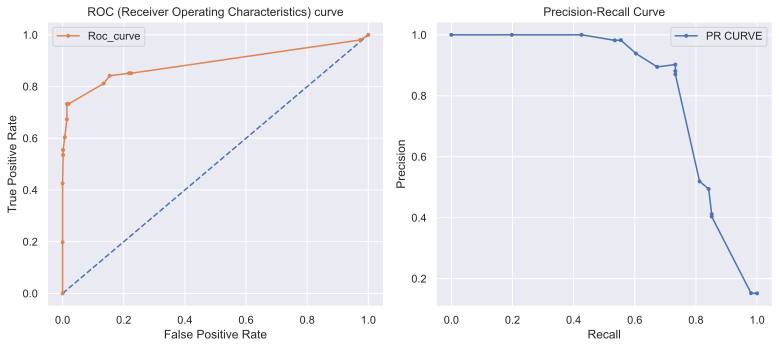

In [74]:
scores(y_test,y_pred_tree)
tree_train = accuracy_score(y_train, y_train_pred_tree)
tree_test = accuracy_score(y_test, y_test_pred_tree)
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))
plot_ConfusionMatrix(y_test,y_pred_tree)
predProb_tree = tree.predict_proba(x_test)
curves(y_test,predProb_tree)

### Decision Tree hyperparameter tuning

In [75]:
tree_params = {"max_depth": range(1, 11), "max_features": range(4, 19)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid = tree_grid.fit(x_train, y_train)
# tree_grid.best_params_  # {'max_depth': 6, 'max_features': 17}
# tree_grid.best_score_  # 0.9355322338830585
# accuracy_score(y_test, tree_grid.predict(x_test))  # 0.946

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this 

In [76]:
tree_grid.cv_results_

{'mean_fit_time': array([0.0129252 , 0.01312957, 0.00956035, 0.01433287, 0.02329903,
        0.02922125, 0.03028145, 0.02237492, 0.03067145, 0.0264791 ,
        0.03236847, 0.0368238 , 0.03730116, 0.02660503, 0.02549343,
        0.01778374, 0.03126273, 0.04034009, 0.0304028 , 0.04294925,
        0.03084536, 0.02726517, 0.02399998, 0.04040046, 0.0397378 ,
        0.03899918, 0.03119245, 0.02881312, 0.02329364, 0.02948704,
        0.03383746, 0.0287148 , 0.03594298, 0.05138726, 0.04155693,
        0.03305397, 0.05934558, 0.04510012, 0.04084783, 0.03464994,
        0.03010678, 0.0220139 , 0.02054343, 0.03047099, 0.02212486,
        0.02992096, 0.01989193, 0.0277966 , 0.03140721, 0.03345604,
        0.03223476, 0.03519921, 0.02771697, 0.02962008, 0.02874331,
        0.02714276, 0.01220317, 0.01960611, 0.03418717, 0.03715277,
        0.02592068, 0.01803942, 0.01732287, 0.01664753, 0.01639876,
        0.02032528, 0.02202644, 0.02488246, 0.0233736 , 0.02256203,
        0.02575731, 0.0121614 ,

In [77]:
tree_grid_scores = pd.DataFrame(tree_grid.cv_results_)[["params","mean_test_score","rank_test_score"]]
tree_grid_scores.sort_values("rank_test_score")

params  mean_test_score  rank_test_score
0      {'max_depth': 1, 'max_features': 4}         0.856715      -2147483648
96    {'max_depth': 7, 'max_features': 10}         0.929108      -2147483648
97    {'max_depth': 7, 'max_features': 11}         0.939610      -2147483648
98    {'max_depth': 7, 'max_features': 12}         0.935109      -2147483648
99    {'max_depth': 7, 'max_features': 13}         0.939613      -2147483648
..                                     ...              ...              ...
51    {'max_depth': 4, 'max_features': 10}         0.905102      -2147483648
52    {'max_depth': 4, 'max_features': 11}         0.923105      -2147483648
53    {'max_depth': 4, 'max_features': 12}         0.919736      -2147483648
55    {'max_depth': 4, 'max_features': 14}         0.915231      -2147483648
149  {'max_depth': 10, 'max_features': 18}              NaN      -2147483648

[150 rows x 3 columns]

### Random Forest Model Implementation

In [78]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
forest = forest.fit(x_train, y_train)
y_pred_forest = forest.predict(x_test)

y_train_pred_forest = forest.predict(x_train)
y_test_pred_forest = forest.predict(x_test)

/var/folders/69/yq7zz3n12pbgn3pfb3cs6j7m0000gn/T/ipykernel_66277/1044847739.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = forest.fit(x_train, y_train)


### Random Forest Model Evaluation

Accuracy  :: 0.94
Precision :: 0.94
Recall    :: 0.65
Specificity :: 0.99
F1score   :: 0.77
Random Forest train/test accuracies 1.000/0.942


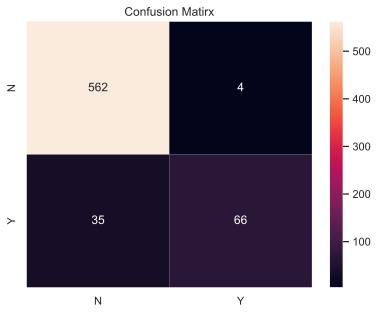

In [79]:
scores(y_test,y_pred_forest)
forest_train = accuracy_score(y_train, y_train_pred_forest)
forest_test = accuracy_score(y_test, y_test_pred_forest)
print('Random Forest train/test accuracies %.3f/%.3f'% (forest_train, forest_test))
plot_ConfusionMatrix(y_test,y_pred_forest)
predProb_forest = forest.predict_proba(x_test)
curves(y_test,predProb_forest)

### Random Forest Hyperparameter tuning

In [80]:
forest_params = {"max_depth": range(6, 12), "max_features": range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(x_train, y_train)

# forest_grid.best_params_, forest_grid.best_score_  # ({'max_depth': 10, 'max_features': 6}, 0.951)
# ({'max_depth': 10, 'max_features': 6}, 0.9511372931045574)
# accuracy_score(y_test, forest_grid.predict(x_test))  # 0.953

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in _

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in _

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in _

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in _

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in _

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in _

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/Users/Mihir/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 938, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/Mihir/anaconda3/lib/python3.9/multiprocessing/pool.py", line 771, in get
    raise self._value
  F

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(6, 12),
                         'max_features': range(4, 19)},
             verbose=True)

In [81]:
forest_grid.cv_results_

{'mean_fit_time': array([0.96717114, 1.21775627, 1.2146636 , 1.29913278, 1.43669505,
        1.43947697, 1.52827559, 1.43971319, 1.49759912, 1.54299431,
        1.43353653, 0.35873146, 0.32245421, 0.2815156 , 0.3448422 ,
        1.0258276 , 1.06288519, 1.00752897, 1.11146307, 1.32750406,
        1.37428036, 1.32950392, 1.4572206 , 1.64396524, 1.830793  ,
        1.68146653, 0.34501185, 0.30991497, 0.27396998, 0.34482875,
        1.18162804, 1.31737957, 1.31555347, 1.38533974, 1.53463435,
        1.63151026, 2.07148838, 2.18798847, 1.82342143, 2.0479435 ,
        1.98645687, 0.46091881, 0.29710298, 0.34396486, 0.31478758,
        1.16055131, 1.32050195, 1.52751694, 1.55373125, 1.58102393,
        1.76138902, 1.78119888, 1.83966217, 2.02823381, 2.20210481,
        2.46613741, 0.53233719, 0.38059473, 0.45537262, 0.45727162,
        1.41734171, 1.49597597, 1.72681842, 1.83491564, 2.03379121,
        2.04106326, 2.2266995 , 2.46252112, 3.11499629, 3.0375998 ,
        2.88597555, 0.56879082,

In [82]:
forest_grid_scores = pd.DataFrame(forest_grid.cv_results_)[["params","mean_test_score","rank_test_score"]]
forest_grid_scores.sort_values("rank_test_score")

params  mean_test_score  rank_test_score
0     {'max_depth': 6, 'max_features': 4}         0.941113      -2147483648
64   {'max_depth': 10, 'max_features': 8}         0.954989      -2147483648
63   {'max_depth': 10, 'max_features': 7}         0.952366      -2147483648
62   {'max_depth': 10, 'max_features': 6}         0.953115      -2147483648
61   {'max_depth': 10, 'max_features': 5}         0.950865      -2147483648
..                                    ...              ...              ...
26   {'max_depth': 7, 'max_features': 15}              NaN      -2147483648
25   {'max_depth': 7, 'max_features': 14}         0.950113      -2147483648
24   {'max_depth': 7, 'max_features': 13}         0.951239      -2147483648
22   {'max_depth': 7, 'max_features': 11}         0.953115      -2147483648
89  {'max_depth': 11, 'max_features': 18}              NaN      -2147483648

[90 rows x 3 columns]

### Implementation of XGboost

In [83]:
xgb = XGBClassifier()
scaler = StandardScaler()
x_train_scaled_xgb = scaler.fit_transform(x_train)
x_test_scaled_xgb = scaler.transform(x_test)

xgb.fit(x_train_scaled_xgb,y_train)
y_pred_xgb = knn.predict(x_test_scaled_xgb)

y_train_pred_xgb = knn.predict(x_train_scaled_xgb)
y_test_pred_xgb = knn.predict(x_test_scaled_xgb)

/Users/Mihir/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[09:23:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

Accuracy  :: 0.86
Precision :: 0.78
Recall    :: 0.14
Specificity :: 0.99
F1score   :: 0.24
XGBoost train/test accuracies 0.882/0.864


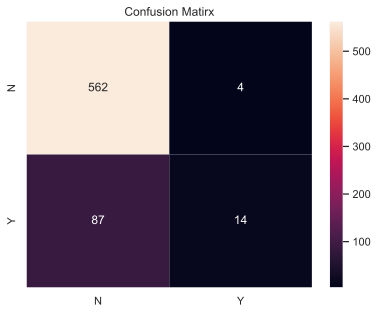

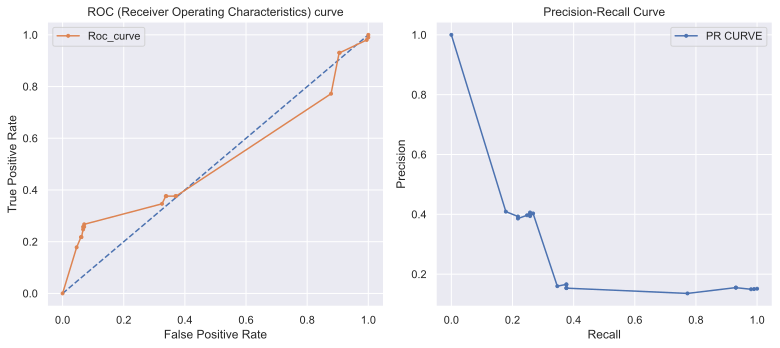

In [84]:
scores(y_test,y_pred_xgb)
xgb_train = accuracy_score(y_train, y_train_pred_xgb)
xgb_test = accuracy_score(y_test, y_test_pred_xgb)
print('XGBoost train/test accuracies %.3f/%.3f'% (xgb_train, xgb_test))
plot_ConfusionMatrix(y_test,y_pred_xgb)
predProb_xgb = forest.predict_proba(x_test_scaled_xgb)
curves(y_test,predProb_xgb)

## Comparing models

In [85]:
logit = LogisticRegression(solver='liblinear', penalty='l1')
knn = KNeighborsClassifier(n_neighbors=10)
dtc = DecisionTreeClassifier(max_depth=5,max_features=11, random_state=17)
rfc = RandomForestClassifier(n_estimators=50,max_depth=10,max_features=9, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [86]:
clfs = {"Logit":logit,
    'KNN' : knn,  
    'DT': dtc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'xgb':xgb
}

In [87]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [88]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


For  Logit
Accuracy -  0.8545727136431784
Precision -  0.5714285714285714
For  KNN
Accuracy -  0.8770614692653673
Precision -  0.9130434782608695
For  DT
Accuracy -  0.9280359820089955
Precision -  0.8955223880597015


/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/var/folders/69/yq7zz3n12pbgn3pfb3cs6j7m0000gn/T/ipykernel_66277/1854534740.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)


For  RF
Accuracy -  0.9475262368815592
Precision -  0.9230769230769231


/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For  AdaBoost
Accuracy -  0.8770614692653673
Precision -  0.6727272727272727


/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For  BgC
Accuracy -  0.952023988005997
Precision -  0.9156626506024096
[09:24:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Mihir/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Mihir/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index

For  xgb
Accuracy -  0.9565217391304348
Precision -  0.9285714285714286


In [89]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [90]:
performance_df

Algorithm  Accuracy  Precision
6       xgb  0.956522   0.928571
3        RF  0.947526   0.923077
5       BgC  0.952024   0.915663
1       KNN  0.877061   0.913043
2        DT  0.928036   0.895522
4  AdaBoost  0.877061   0.672727
0     Logit  0.854573   0.571429

Looking at this table, I can see that the Random Forest model gives has both the highest accuracy and precision. I will be going ahead with this model when I am deploy my webapp. I have not done any hyperparameter tuning on xg boost but still I want to go with the random forest model.

## Saving the final model for deployment

In [91]:
import pickle

In [92]:
output_file = "model.pkl"
with open(output_file, 'wb') as f_out:
    pickle.dump(rfc, f_out)

print(f'the model is saved to {output_file}')

the model is saved to model.pkl


## Final thoughts

Doing this entire churn prediction project has been a great opportunity to dive into the details of building and evaluating machine learning models to predict customer churn. It was exciting to use the various data visualization and statistical techniques to identify patterns and trends within the data and understand the factors that contribute to customer churn. This project also highlights the importance of measuring the performance of the models and using different metrics to get a holistic view of the model's accuracy. Also, the deployment of the model on a web-based platform such as Heroku make the model easily accessible to everyone who is authorized to use it, and make it possible for business to take action on the predictions.